<a href="https://colab.research.google.com/github/ropero99/Codigos_EE_IA/blob/main/LocalBiplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#!pip install tabulate
#!pip uninstall umap
!pip install umap-learn

In [41]:
FILEID = "1Ty1KHmEv5hZequVASIBCaE74bUFJkXZh"

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O data.xlsx && rm -rf /tmp/cookies.txt
#!unzip codigos.zip
!dir

--2025-05-29 15:43:26--  https://docs.google.com/uc?export=download&confirm=&id=1Ty1KHmEv5hZequVASIBCaE74bUFJkXZh
Resolving docs.google.com (docs.google.com)... 192.178.155.101, 192.178.155.102, 192.178.155.138, ...
Connecting to docs.google.com (docs.google.com)|192.178.155.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Ty1KHmEv5hZequVASIBCaE74bUFJkXZh&export=download [following]
--2025-05-29 15:43:26--  https://drive.usercontent.google.com/download?id=1Ty1KHmEv5hZequVASIBCaE74bUFJkXZh&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.163.132, 2607:f8b0:4004:c23::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.163.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1377775 (1.3M) [application/octet-stream]
Saving to: ‘data.xlsx’

data.xlsx           100%[===================>]   1.31M  --.

#Read data Bloque_25

In [42]:
import pandas as pd

# Ruta al archivo Excel
file_path = "data.xlsx"
sheet_ = 'Cruce'

# Leer la hoja 'Bloque_25' como DataFrame
df_ = pd.read_excel(file_path, sheet_name=sheet_)

# Mostrar las primeras filas del DataFrame
df_.head()


fecha    tiempo  aire241administrarivo  aire242administrarivo  \
0 2024-10-01  00:00:00                5.95905                0.03866   
1 2024-10-01  01:00:00                5.19461                0.03904   
2 2024-10-01  02:00:00                5.56717                0.03949   
3 2024-10-01  03:00:00                4.94585                0.03837   
4 2024-10-01  04:00:00                4.76001                0.03865   

   aire243clase  aire245clase  243circuito09pacho  245circuito1  245circuito2  \
0       0.04109       1.11873                0.07          0.01          0.04   
1       0.04180       1.11392                0.07          0.01          0.04   
2       0.04184       3.51032                0.07          0.01          0.04   
3       0.04074       7.66650                0.07          0.01          0.04   
4       0.04116       9.03926                0.07          0.01          0.04   

   245circuito5  ...  253toma_regulada2  252iluminacion   \
0          0.01  ...                0.0             0.01   
1          0.01  ...                0.0             0.00   
2          0.02  ...                0.0             0.01   
3          0.02  ...                0.0             0.00   
4          0.02  ...                0.0             0.01   

   252toma_no_regulada1  252toma_no_regulada2  252toma_regulada1  \
0                   0.0                  0.03                0.0   
1                   0.0                  0.03                0.0   
2                   0.0                  0.03                0.0   
3                   0.0                  0.03                0.0   
4                   0.0                  0.03                0.0   

   252toma_regulada2  252aire  aire_lb_fisica  aire_lb_prototipado  \
0                0.0     1.04            1.28                 0.70   
1                0.0     1.47            1.14                 0.70   
2                0.0     1.01            0.94                 0.69   
3                0.0     1.38            0.91                 0.69   
4                0.0     0.92            1.02                 0.69   

   C9_Lb_Biologia  
0            0.07  
1            0.07  
2            0.07  
3            0.07  
4            0.07  

[5 rows x 21 columns]

In [43]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3623 entries, 0 to 3622
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha                  3623 non-null   datetime64[ns]
 1   tiempo                 3623 non-null   object        
 2   aire241administrarivo  3623 non-null   float64       
 3   aire242administrarivo  3623 non-null   float64       
 4   aire243clase           3623 non-null   float64       
 5   aire245clase           3623 non-null   float64       
 6   243circuito09pacho     3623 non-null   float64       
 7   245circuito1           3623 non-null   float64       
 8   245circuito2           3623 non-null   float64       
 9   245circuito5           3623 non-null   float64       
 10  253toma_regulada1      3623 non-null   float64       
 11  253toma_regulada2      3623 non-null   float64       
 12  252iluminacion         3623 non-null   float64       
 13  252

#Descomposición de datos

In [44]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

def decompose_signal(signal: pd.Series, model: str = 'additive', freq: int = None, plot: bool = True):
    """
    Decompose a time series signal into trend, seasonal, and residual components.

    Parameters:
        signal (pd.Series): The time series signal to decompose (must have a datetime index or be properly indexed).
        model (str): Either 'additive' or 'multiplicative'. Default is 'additive'.
        freq (int): The number of observations per cycle. Required if not inferrable.
        plot (bool): Whether to plot the decomposition. Default is True.

    Returns:
        result (DecomposeResult): Object with seasonal, trend, and resid attributes.
    """
    result = seasonal_decompose(signal, model=model, period=freq)

    if plot:
        result.plot()
        plt.tight_layout()
        plt.show()

    return result


In [45]:
df_.columns

Index(['fecha', 'tiempo', 'aire241administrarivo', 'aire242administrarivo',
       'aire243clase', 'aire245clase', '243circuito09pacho', '245circuito1',
       '245circuito2', '245circuito5', '253toma_regulada1',
       '253toma_regulada2', '252iluminacion ', '252toma_no_regulada1',
       '252toma_no_regulada2', '252toma_regulada1', '252toma_regulada2',
       '252aire', 'aire_lb_fisica', 'aire_lb_prototipado', 'C9_Lb_Biologia'],
      dtype='object')

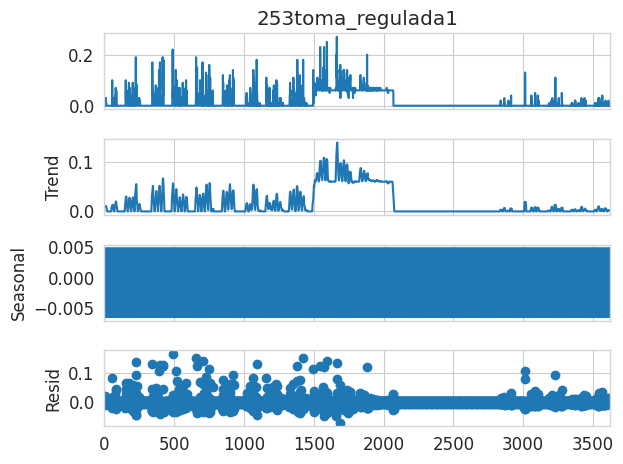

In [46]:
# Suponiendo que tienes una columna de señal en tu DataFrame, por ejemplo 'valor':
column_ = '253toma_regulada1'
result = decompose_signal(df_[column_], model='additive', freq=12)


#Normalizacion de Datos

In [47]:
# Normalización (MinMaxScaler())

from sklearn.preprocessing import MinMaxScaler

columns_ = ['aire241administrarivo', 'aire242administrarivo',
       'aire243clase', 'aire245clase', '243circuito09pacho', '245circuito1',
       '245circuito2', '245circuito5', '253toma_regulada1',
       '253toma_regulada2', '252iluminacion ', '252toma_no_regulada1',
       '252toma_no_regulada2', '252toma_regulada1', '252toma_regulada2',
       '252aire', 'aire_lb_fisica', 'aire_lb_prototipado', 'C9_Lb_Biologia']

# instacia el escalador
sca_ = MinMaxScaler()

# Guarda el resultado en X_, que será una matriz numpy con los datos normalizados.
X_ = sca_.fit_transform(df_[columns_].to_numpy())


In [48]:
# Transformación de columnas temporales
# tiempo en un número entero (HHMM).
# fecha a formato datetime y luego a formato numérico (AAAAMMDD).


# Asegurar que la columna 'tiempo' es string y extraer la hora de inicio
df_copy= df_.copy()
df_copy['tiempo'] = df_copy['tiempo'].astype(str)
hora_inicio = df_copy['tiempo'].str.extract(r'(\d{2}):(\d{2})')

# Unir las partes y convertir a número entero (por ejemplo, '22:00' → 2200)
df_copy['tiempo'] = (hora_inicio[0] + hora_inicio[1]).astype(int)

# Asegurar que la columna 'fecha' sea de tipo datetime
df_copy['fecha'] = pd.to_datetime(df_copy['fecha'])

# Convertir al formato entero AAAAMMDD
df_copy['fecha'] = df_['fecha'].dt.strftime('%Y%m%d').astype(int)

# Convertir 'fecha' a datetime y luego a número tipo MMDD
df_copy['fecha_md'] = pd.to_datetime(df_['fecha'])
df_copy['fecha_md'] = df_copy['fecha_md'].dt.strftime('%m').astype(int)




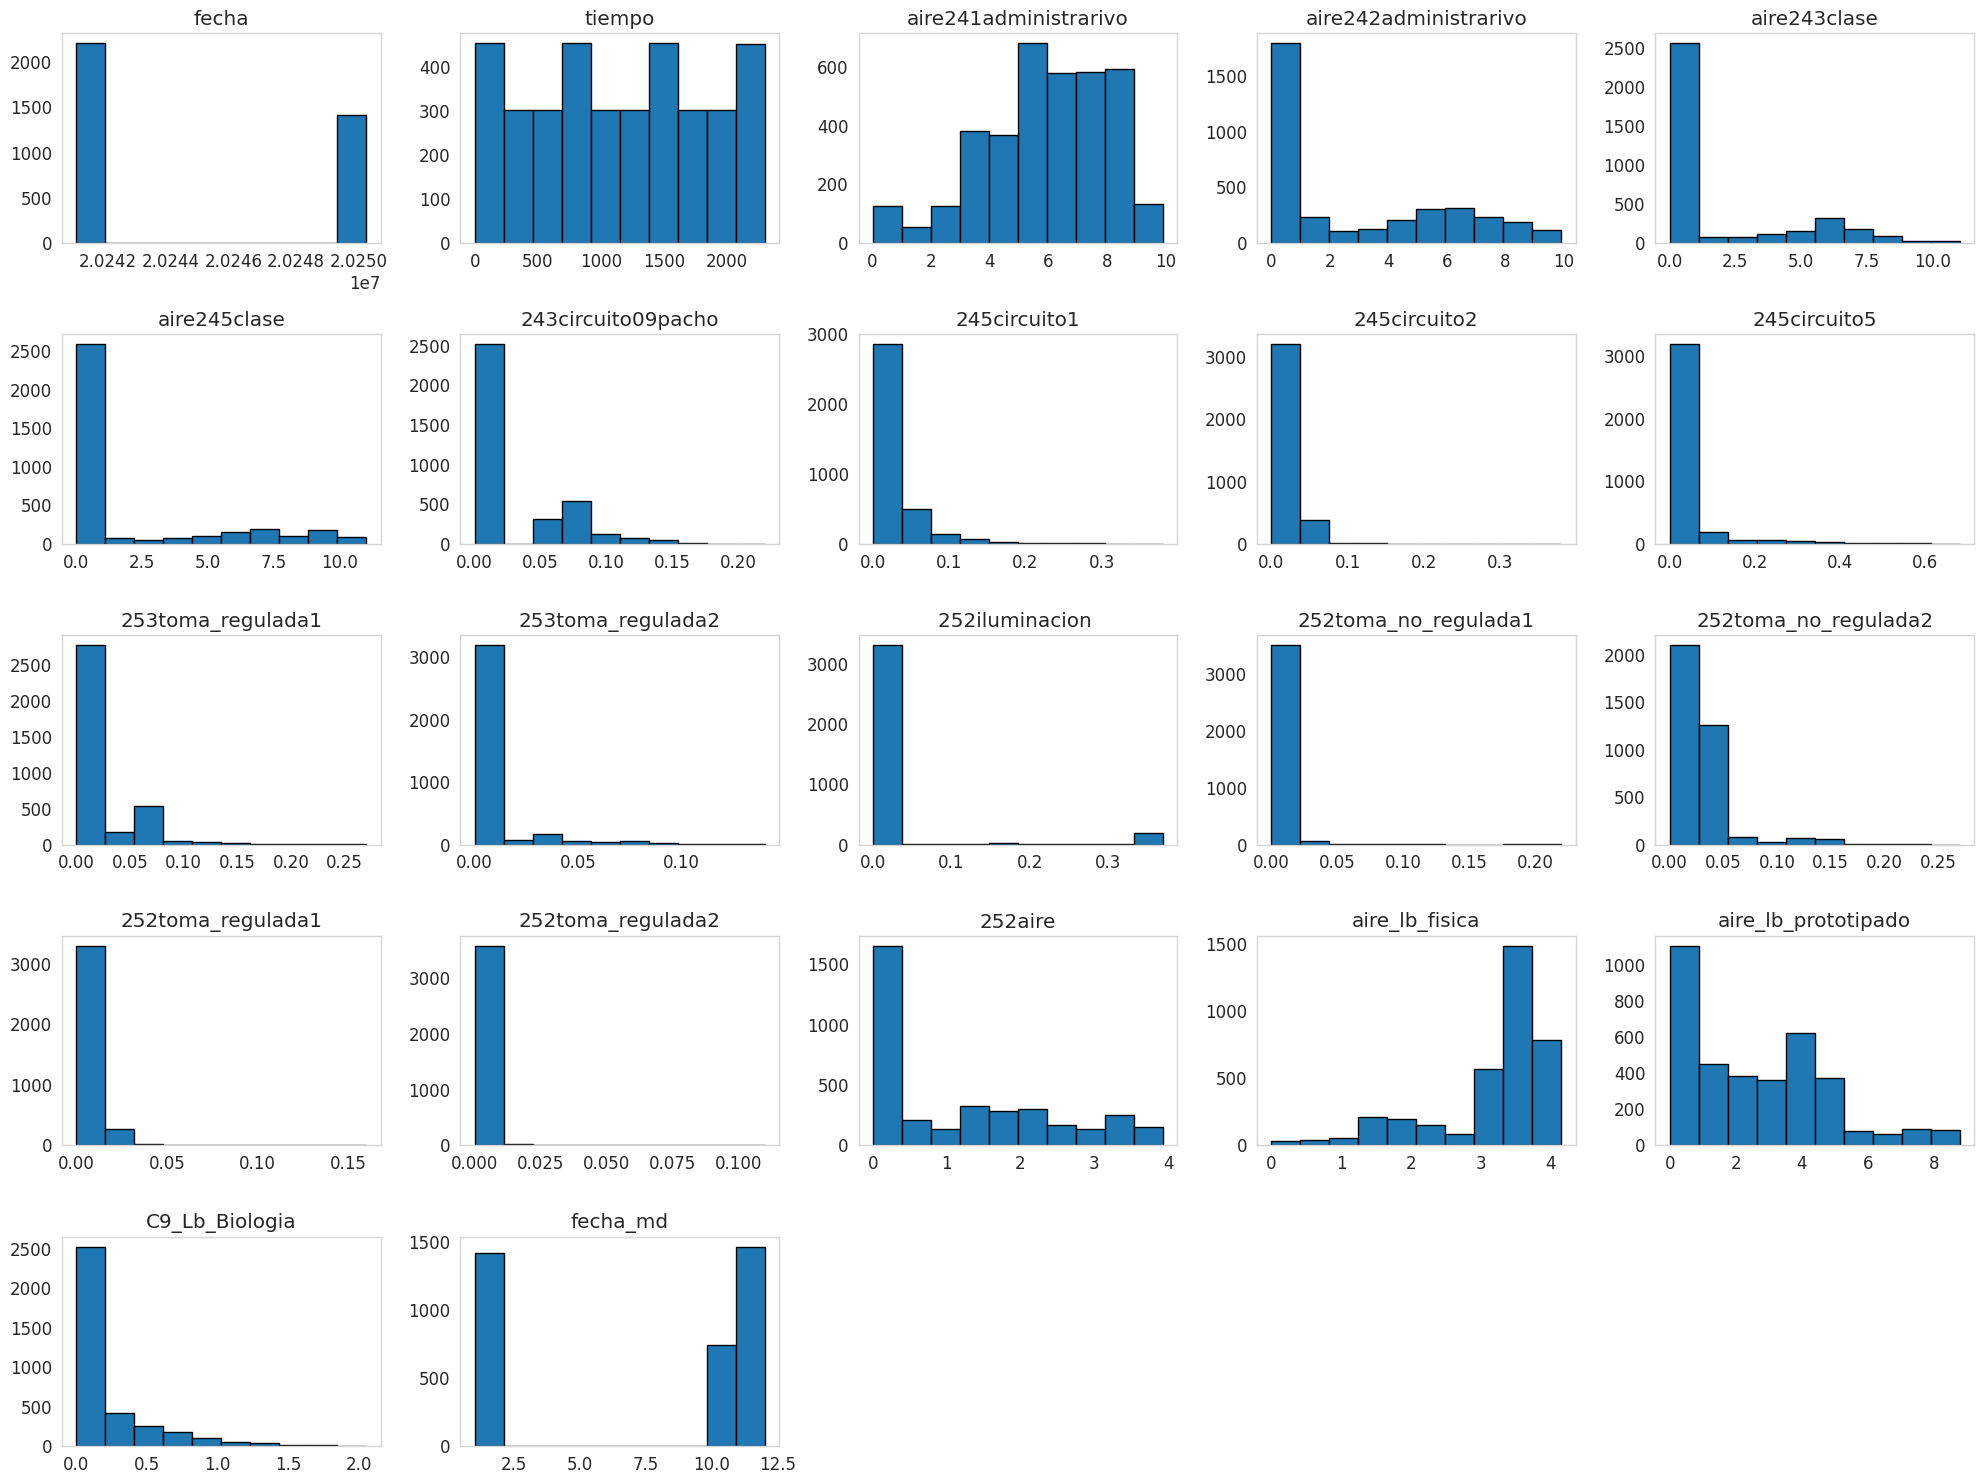

In [49]:
df_copy.hist(figsize=(20, 15),edgecolor='black', grid=False)
plt.tight_layout()

plt.show()

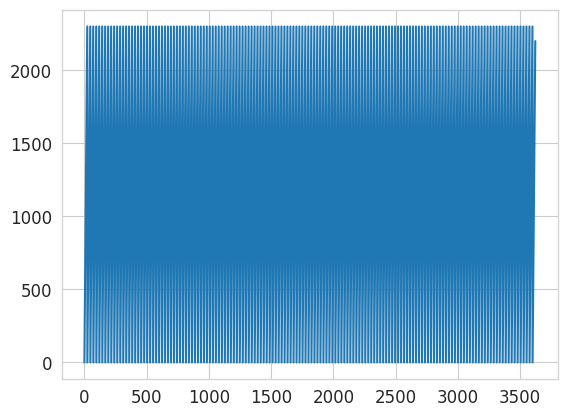

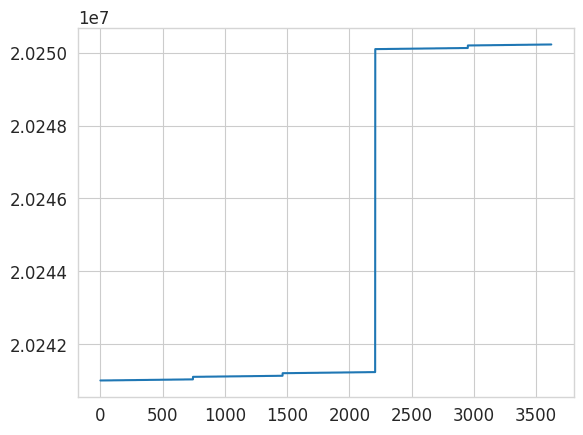

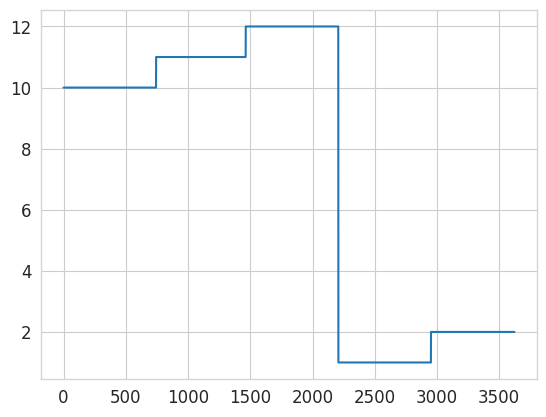

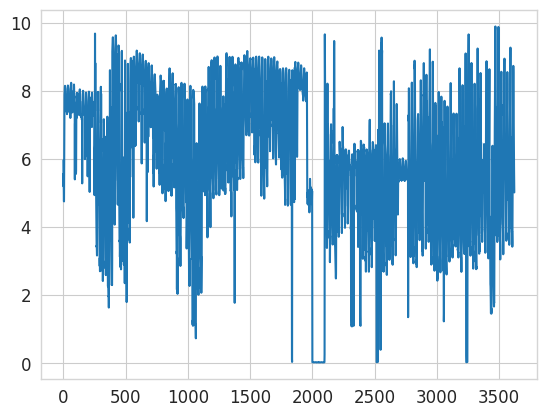

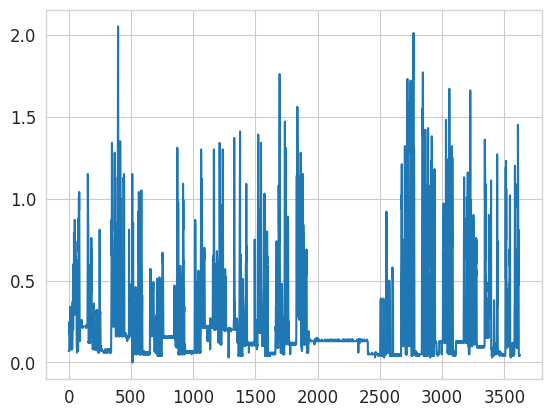

In [50]:
df_copy['tiempo'].plot()
plt.show()

df_copy['fecha'].plot()
plt.show()

df_copy['fecha_md'].plot()
plt.show()

df_copy['aire241administrarivo'].plot()
plt.show()

df_copy['C9_Lb_Biologia'].plot()
plt.show()

#Reducción de Dimencionalidad UMAP

In [51]:
from umap import UMAP

# Instancia un objeto umap configurado, 2 dimienciones.
umap_ = UMAP(n_components=2,n_neighbors=50,random_state=42)


In [52]:
# Aplica UMAP a los datos(X_) ya normalizados.
Z = umap_.fit_transform(X_)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [53]:
# Z es una matriz de dos columnas: UMAP 1 y UMAP 2.
# todos los datos fueron transformados en un espacio 2d para visualizar facilmente.
Z

array([[12.672855  ,  6.1721725 ],
       [12.773673  ,  6.7019525 ],
       [14.870223  ,  0.97947127],
       ...,
       [ 5.62384   ,  1.6060604 ],
       [11.177519  , -1.5638635 ],
       [11.223694  , -1.591113  ]], dtype=float32)

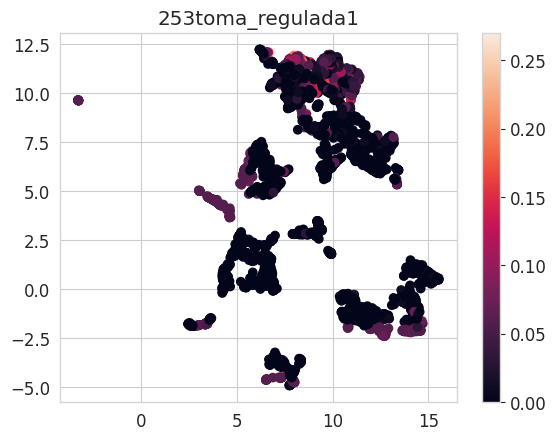

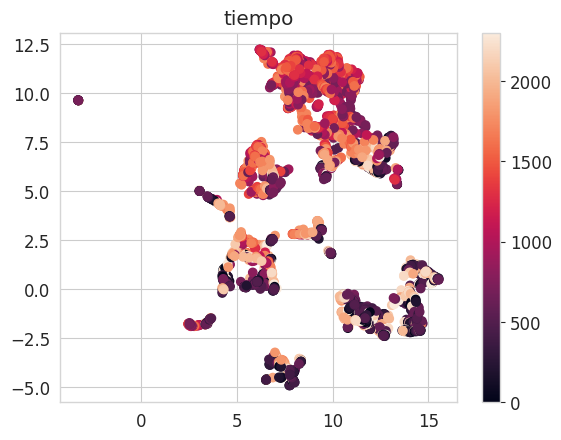

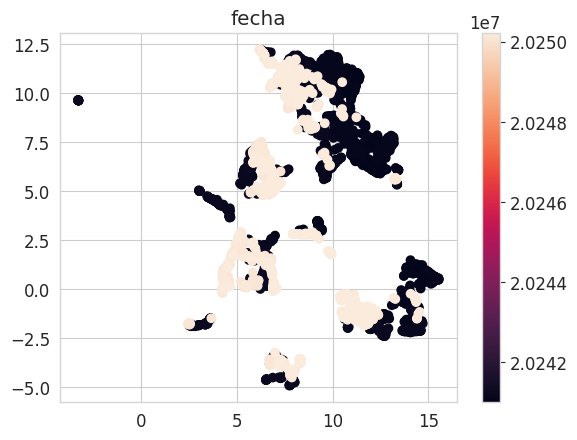

In [54]:
# el color de cada punto depende del valor de la variable original column_ (por ejemplo, consumo de un salón específico).
# Z[:,0] es la coordenada UMAP 1 (eje X).


plt.scatter(Z[:,0],Z[:,1],c=df_[column_])
plt.colorbar()
plt.title(column_)
plt.show()

# cómo varía el consumo u otras variables según la hora, proyectado en el espacio reducido.
plt.scatter(Z[:,0],Z[:,1],c=df_copy['tiempo'])
plt.title('tiempo')
plt.colorbar()
plt.show()

plt.scatter(Z[:,0],Z[:,1],c=df_copy['fecha'])
plt.title('fecha')
plt.colorbar()
plt.show()

In [55]:
import numpy as np
ticks_fecha = [float(np.min(df_copy['fecha'].to_numpy())),
               float(np.percentile(df_copy['fecha'].to_numpy(),25)),
               float(np.percentile(df_copy['fecha'].to_numpy(),50)),
               float(np.percentile(df_copy['fecha'].to_numpy(),75)),
               float(np.max(df_copy['fecha'].to_numpy()))]


ticks_fecha_val = []
for val_ in ticks_fecha:
  ind_ = int(np.where(df_copy['fecha'].to_numpy()==val_)[0][0])
  ticks_fecha_val.append(str(df_.loc[ind_,'fecha'])[:10])
print(ticks_fecha_val)


ticks_fecha_md = [float(np.min(df_copy['fecha_md'].to_numpy())),
               float(np.percentile(df_copy['fecha_md'].to_numpy(),25)),
               float(np.percentile(df_copy['fecha_md'].to_numpy(),50)),
               float(np.percentile(df_copy['fecha_md'].to_numpy(),75)),
               float(np.max(df_copy['fecha_md'].to_numpy()))]






['2024-10-01', '2024-11-07', '2024-12-15', '2025-01-22', '2025-02-28']


In [56]:
ticks_fecha_md

[1.0, 2.0, 10.0, 11.0, 12.0]

In [57]:
column_

'253toma_regulada1'

In [58]:
!pip install adjustText
!pip install adjustText seaborn

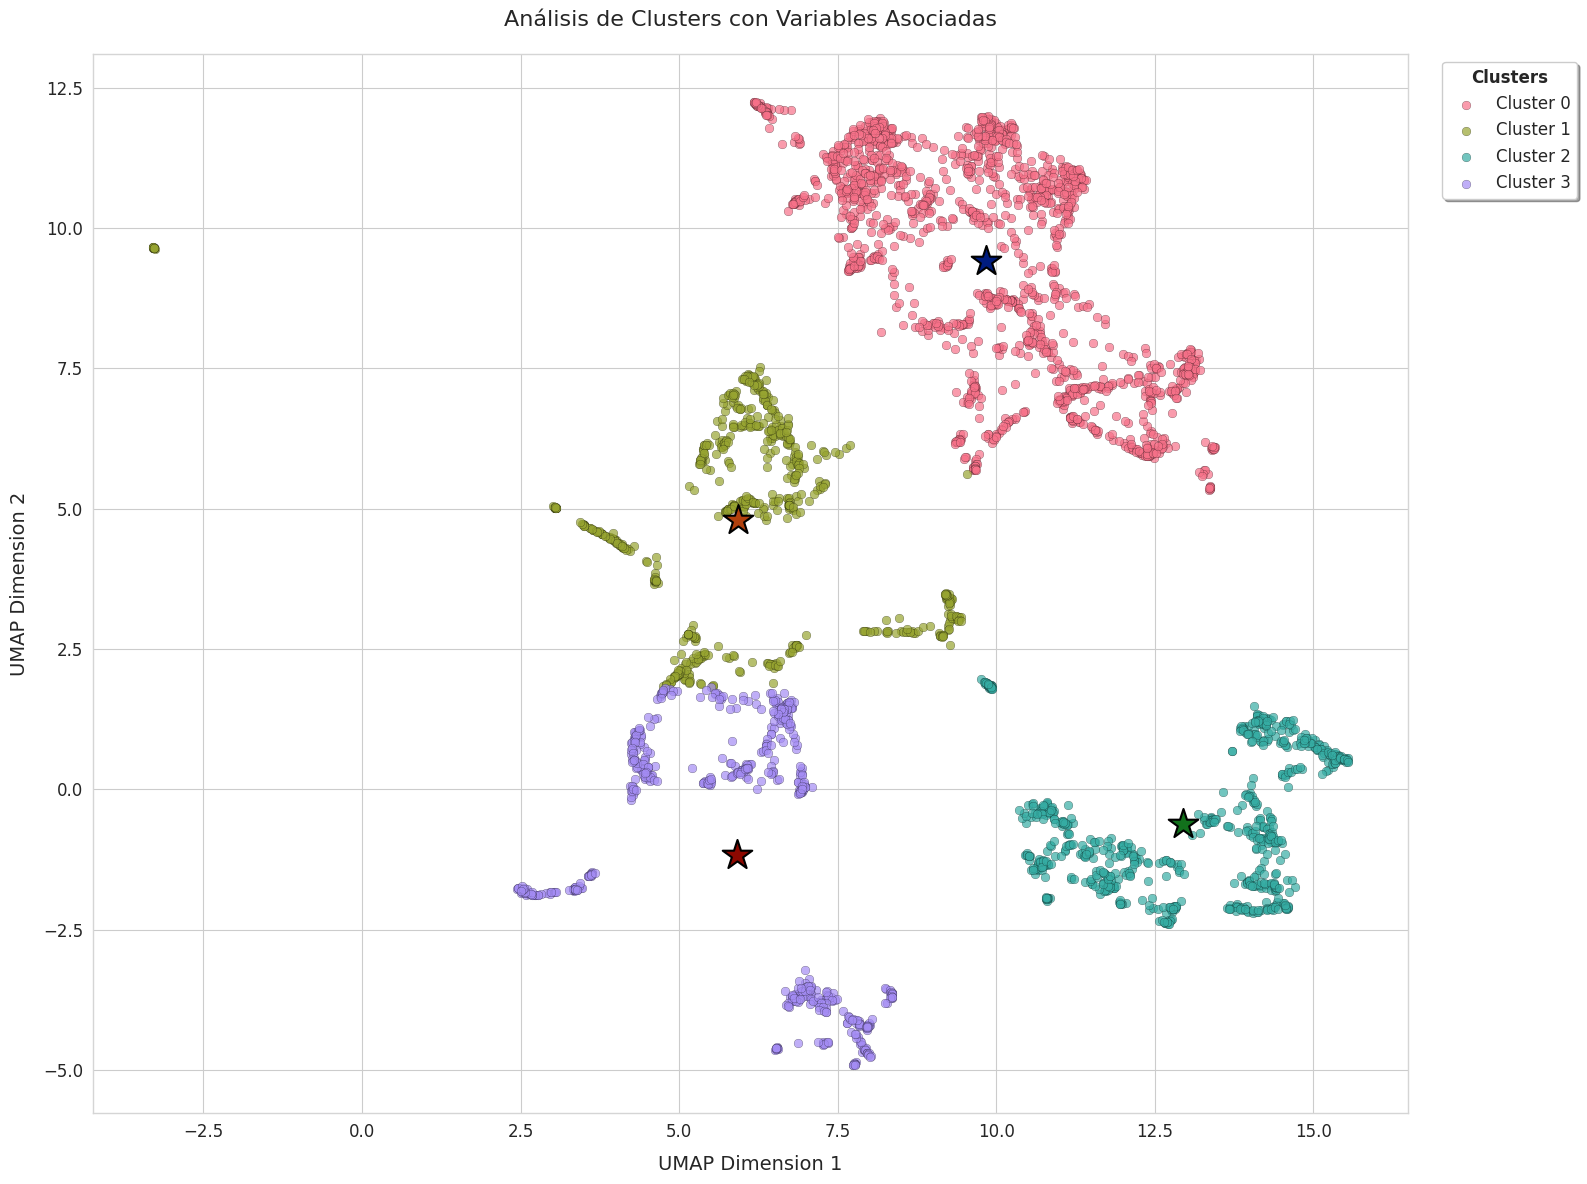

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from adjustText import adjust_text
import seaborn as sns  # Importamos seaborn para los estilos

## ----------------------------------------------------------
## 1. Configuración inicial y clustering
## ----------------------------------------------------------
plt.figure(figsize=(16, 12))

# Configuración de estilo usando seaborn
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.weight': 'normal',
    'font.size': 12,
    'axes.edgecolor': '#d5d5d5',
    'axes.linewidth': 1
})

# Paleta de colores profesional
cluster_colors = sns.color_palette("husl", 4)
centroid_colors = sns.color_palette("dark", 4)

# Perform KMeans clustering on the UMAP reduced data (Z)
# We choose n_clusters=4 based on the subsequent plotting loop
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Add n_init for newer sklearn versions
cluster_labels = kmeans.fit_predict(Z) #__________________________________________________________________________

# Define cluster_loadings dictionary - this was also not defined
# A simple example of how you might calculate loadings (this is conceptual and depends on your goal)
# You might want to calculate the average feature values per cluster from your original scaled data (X_)
cluster_loadings = {}
for cluster in range(4):
    # For simplicity, let's just store the mean UMAP centroid for now
    # A more meaningful loading would relate original features to clusters
    cluster_loadings[cluster] = Z[cluster_labels == cluster].mean(axis=0).reshape(1, -1)


## ----------------------------------------------------------
## 2. Visualización de puntos por cluster
## ----------------------------------------------------------
for cluster in range(4):
    cluster_points = Z[cluster_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                color=cluster_colors[cluster], alpha=0.7, s=40,
                edgecolor='k', linewidth=0.2,
                label=f'Cluster {cluster}')

## ----------------------------------------------------------
## 3. Centroides destacados
## ----------------------------------------------------------
centroids_umap = []
texts = []

for cluster in range(4):
    centroid = Z[cluster_labels == cluster].mean(axis=0)
    centroids_umap.append(centroid)
    plt.scatter(centroid[0], centroid[1],
                marker='*', s=500, color=centroid_colors[cluster],
                edgecolors='k', linewidth=1.5, zorder=5)

## ----------------------------------------------------------
## 4. Flechas y etiquetas optimizadas
## ----------------------------------------------------------
max_arrow_length = np.max(np.abs(Z)) * 0.3


## ----------------------------------------------------------
## 5. Elementos gráficos finales
## ----------------------------------------------------------
plt.xlabel('UMAP Dimension 1', fontsize=14, labelpad=10)
plt.ylabel('UMAP Dimension 2', fontsize=14, labelpad=10)
plt.title('Análisis de Clusters con Variables Asociadas', fontsize=16, pad=20)

# Leyenda mejorada
legend = plt.legend(fontsize=12, frameon=True,
                   shadow=True, facecolor='white',
                   bbox_to_anchor=(1.02, 1), loc='upper left')
legend.set_title('Clusters', prop={'size': 12, 'weight': 'bold'})

# Ajustar márgenes
plt.subplots_adjust(right=0.85)

plt.tight_layout()
plt.show()

# Coeficiente de Silueta (K optimo)

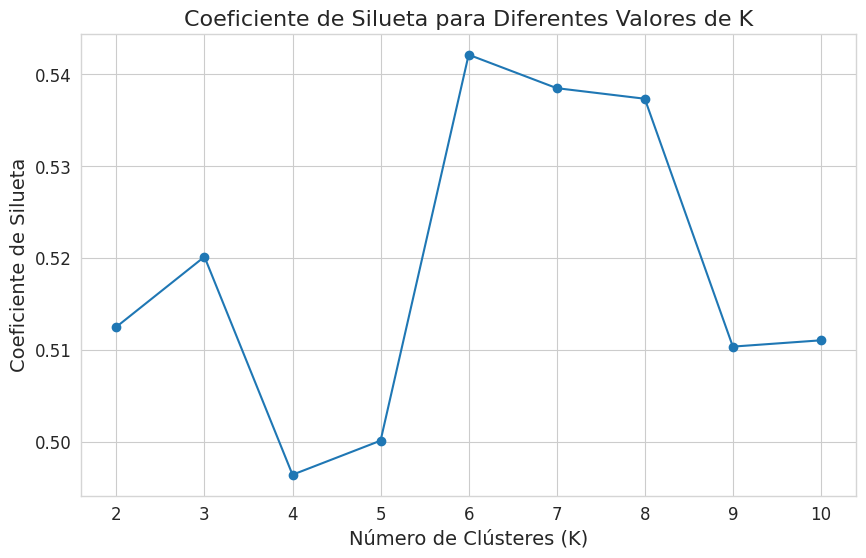

Mejor K basado en el puntaje de silueta: 6


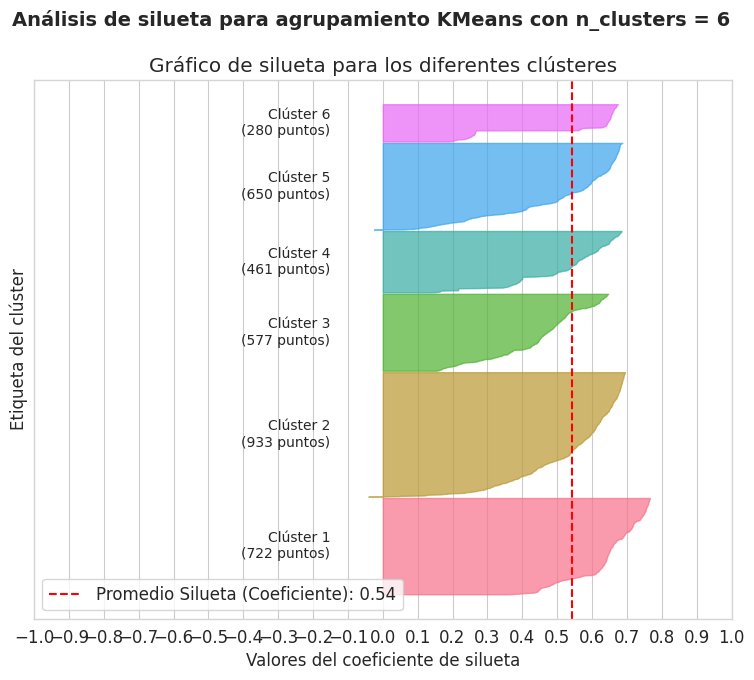

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import seaborn as sns

# Calcular los puntajes de silueta para diferentes valores de K
silhouette_scores = []
K_range = range(2, 11)  # Evaluar valores de K desde 2 hasta 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels_k = kmeans.fit_predict(Z)  # Usar los datos reducidos con UMAP almacenados en Z

    # Evitar calcular la silueta si todos los puntos pertenecen a un solo clúster
    if len(np.unique(cluster_labels_k)) < 2:
        silhouette_scores.append(-1)  # Indicador para valores no válidos
    else:

        # devuelve el promedio general del coeficiente de silueta para todos los puntos
        score = silhouette_score(Z, cluster_labels_k)
        silhouette_scores.append(score)



# Graficar los puntajes promedio de silueta para cada valor de K
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Número de Clústeres (K)', fontsize=14)
#plt.ylabel('Puntaje Promedio de Silueta', fontsize=14)
plt.ylabel('Coeficiente de Silueta', fontsize=14)
#plt.title('Puntaje de Silueta para Diferentes Valores de K', fontsize=16)
plt.title('Coeficiente de Silueta para Diferentes Valores de K', fontsize=16)
plt.xticks(K_range)
plt.grid(True)
plt.show()

# Opcional: graficar los coeficientes de silueta individuales para el mejor K (el de mayor puntaje)
best_k = K_range[np.argmax(silhouette_scores)]
print(f"Mejor K basado en el puntaje de silueta: {best_k}")

if best_k >= 2:
    kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
    cluster_labels_best_k = kmeans.fit_predict(Z)
    silhouette_avg = silhouette_score(Z, cluster_labels_best_k)
    sample_silhouette_values = silhouette_samples(Z, cluster_labels_best_k)

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)

    y_lower = 10
    for i in range(best_k):
        # Obtener y ordenar los valores de silueta del clúster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_best_k == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = sns.color_palette("husl", best_k)[i]  # Usar paleta de colores de seaborn
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Etiquetar el número del clúster en la mitad de su sección
        #ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        ax1.text(-0.15, y_lower + 0.5 * size_cluster_i,
         f"Clúster {i+1}\n({size_cluster_i} puntos)",
         fontsize=10, ha='right', va='center')

        # Actualizar y_lower para el siguiente clúster
        y_lower = y_upper + 10  # Separación entre bloques

    ax1.set_title("Gráfico de silueta para los diferentes clústeres")
    ax1.set_xlabel("Valores del coeficiente de silueta")
    ax1.set_ylabel("Etiqueta del clúster")

    # Línea vertical indicando el promedio general de silueta
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--",
                label=f'Promedio Silueta (Coeficiente): {silhouette_avg:.2f}')

    ax1.set_yticks([])  # Eliminar etiquetas del eje y
    ax1.set_xticks(np.arange(-1, 1.1, 0.1))  # Personalizar los ticks del eje x

    plt.suptitle((f"Análisis de silueta para agrupamiento KMeans con "
                  f"n_clusters = {best_k}"),
                 fontsize=14, fontweight='bold')
    plt.legend()
    plt.show()
else:
    print("No se puede graficar la silueta individual ya que best_k es menor que 2.")


Para n_clusters = 2, el puntaje promedio de silueta es: 0.5125
Para n_clusters = 3, el puntaje promedio de silueta es: 0.5201
Para n_clusters = 4, el puntaje promedio de silueta es: 0.4964
Para n_clusters = 5, el puntaje promedio de silueta es: 0.5001
Para n_clusters = 6, el puntaje promedio de silueta es: 0.5421
Para n_clusters = 7, el puntaje promedio de silueta es: 0.5385
Para n_clusters = 8, el puntaje promedio de silueta es: 0.5373
Para n_clusters = 9, el puntaje promedio de silueta es: 0.5103
Para n_clusters = 10, el puntaje promedio de silueta es: 0.5110

Tabla de Puntajes Promedio de Silueta:
  Número de Clústeres (K)    Puntaje Promedio de Silueta
-------------------------  -----------------------------
                        2                         0.5125
                        3                         0.5201
                        4                         0.4964
                        5                         0.5001
                        6                         

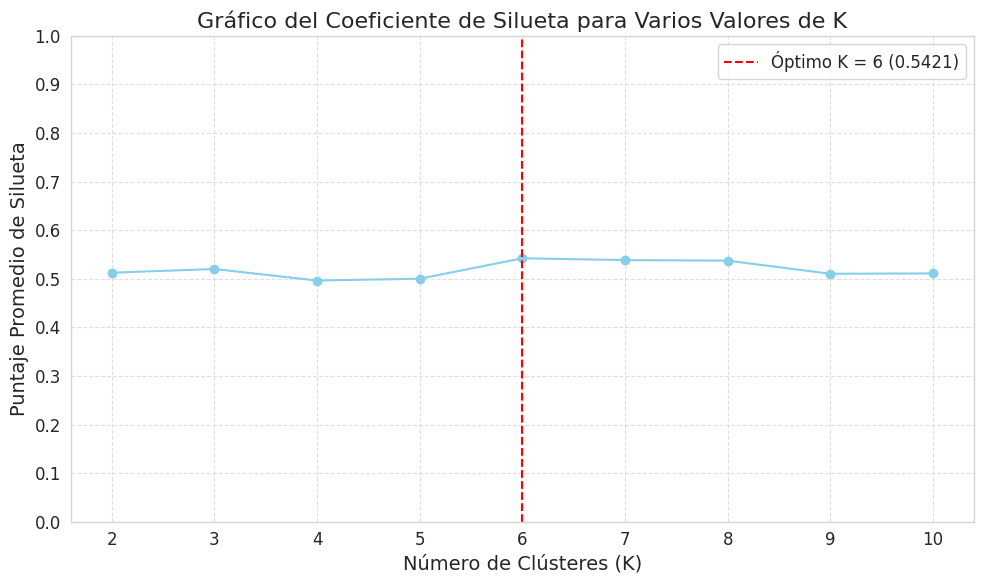


El número óptimo de clústeres (K) basado en el puntaje máximo de silueta es: 6


In [61]:
# gráficos de coeficientes de silueta para distintos valores de K
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from tabulate import tabulate # Importamos tabulate

# Rango de K (número de clústeres) a evaluar
# Generalmente se prueban valores desde 2 hasta un número razonable
# basado en el tamaño de tus datos. Aquí usamos hasta 10 como ejemplo.
range_n_clusters = list(range(2, 11))

# Lista para almacenar los puntajes de silueta
silhouette_avg_scores = []

# Iterar sobre cada valor de K
for n_clusters in range_n_clusters:
    # Inicializar el clústerer KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Añadimos n_init
    # Ajustar el KMeans a los datos reducidos (Z) y predecir las etiquetas
    cluster_labels = kmeans.fit_predict(Z)

    # Calcular el puntaje promedio de silueta
    # El puntaje de silueta para una muestra se define como (b - a) / max(a, b)
    # donde a es la distancia media a las otras muestras en el mismo clúster
    # y b es la distancia media a las muestras en el *siguiente* clúster más cercano.
    # El puntaje más alto es mejor.
    silhouette_avg = silhouette_score(Z, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

    # Opcional: Imprimir el puntaje para cada K
    print(f"Para n_clusters = {n_clusters}, el puntaje promedio de silueta es: {silhouette_avg:.4f}")

# Presentar los resultados en una tabla usando tabulate
print("\nTabla de Puntajes Promedio de Silueta:")
table_data = [[k, score] for k, score in zip(range_n_clusters, silhouette_avg_scores)]
print(tabulate(table_data, headers=["Número de Clústeres (K)", "Puntaje Promedio de Silueta"], floatfmt=".4f"))


# Graficar los puntajes de silueta vs. el número de clústeres (K)
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o', linestyle='-', color='skyblue')

# Añadir título y etiquetas
plt.title('Gráfico del Coeficiente de Silueta para Varios Valores de K', fontsize=16)
plt.xlabel('Número de Clústeres (K)', fontsize=14)
plt.ylabel('Puntaje Promedio de Silueta', fontsize=14)

# Añadir una línea horizontal punteada en el puntaje máximo para identificar el K óptimo
optimal_k_index = np.argmax(silhouette_avg_scores)
optimal_k = range_n_clusters[optimal_k_index]
optimal_score = silhouette_avg_scores[optimal_k_index]
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Óptimo K = {optimal_k} ({optimal_score:.4f})')


# Mejorar la cuadrícula y los ticks
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range_n_clusters) # Asegurar que los ticks del eje X son los valores de K evaluados
plt.yticks(np.arange(0, 1.1, 0.1)) # Ajustar los ticks del eje Y para los puntajes de silueta

# Añadir leyenda
plt.legend()

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

print(f"\nEl número óptimo de clústeres (K) basado en el puntaje máximo de silueta es: {optimal_k}")


# Biplot

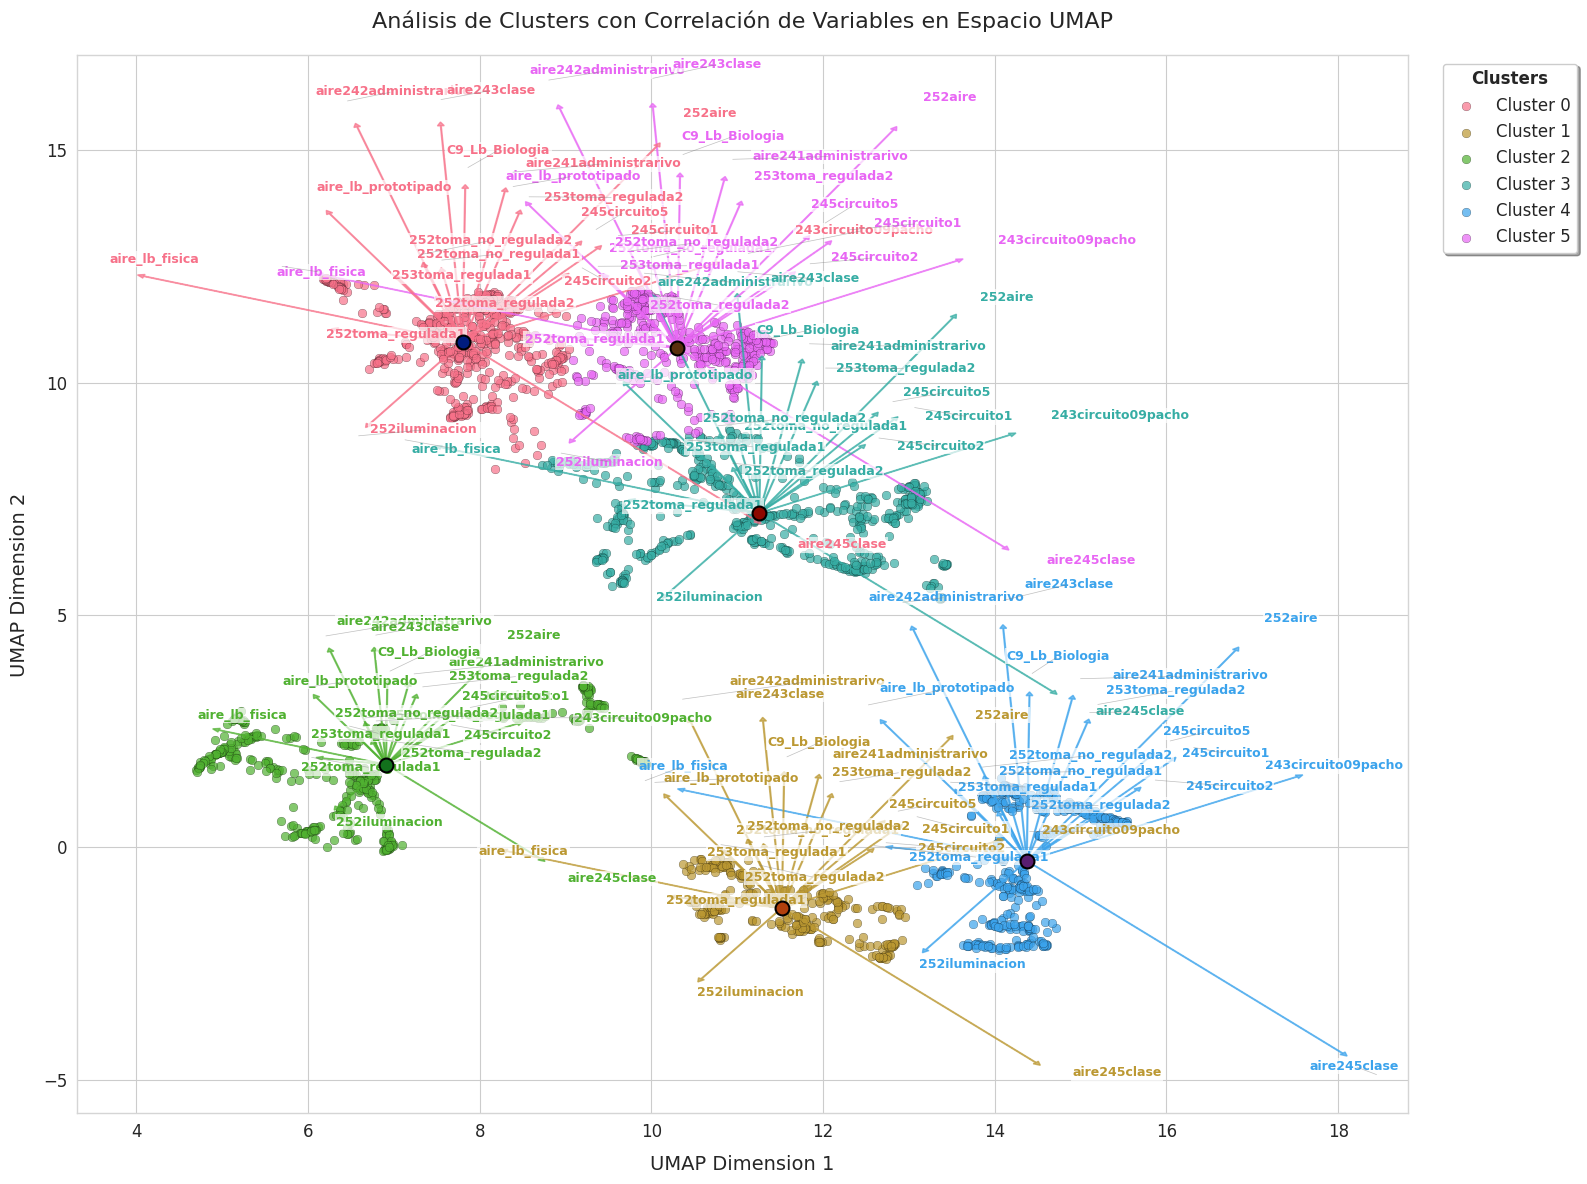

In [62]:
import matplotlib.pyplot as plt
import numpy as np
# Calculate the mean of the original scaled features for each cluster
mean_scaled_features_per_cluster = {}
for cluster in range(6):
    # Select the original scaled data (X_) that belongs to the current cluster
    cluster_indices = np.where(cluster_labels == cluster)[0]
    cluster_scaled_data = X_[cluster_indices]
    # Calculate the mean of the scaled features for this cluster
    mean_scaled_features_per_cluster[cluster] = np.mean(cluster_scaled_data, axis=0)



# Calculate the correlation matrix between original scaled features and UMAP dimensions
correlation_matrix = np.corrcoef(X_.T, Z.T)[:len(columns_), len(columns_):] # Correlate X_ with Z

# Normalize the correlation vectors for better visualization
# We can scale them so they are visible but don't clutter the plot too much
max_corr = np.max(np.abs(correlation_matrix))
correlation_matrix_scaled = correlation_matrix / max_corr * np.max(np.abs(Z)) * 0.2 # Scale by a fraction of UMAP range

# Now, redraw the plot using these correlation vectors originating from the centroids
plt.figure(figsize=(16, 12))

# Configuración de estilo usando seaborn
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.weight': 'normal',
    'font.size': 12,
    'axes.edgecolor': '#d5d5d5',
    'axes.linewidth': 1
})

# Paleta de colores profesional
cluster_colors = sns.color_palette("husl", 6)
centroid_colors = sns.color_palette("dark", 6)

# 2. Visualización de puntos por cluster
for cluster in range(6):
    cluster_points = Z[cluster_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                color=cluster_colors[cluster], alpha=0.7, s=40,
                edgecolor='k', linewidth=0.2,
                label=f'Cluster {cluster}')

# 3. Centroides destacados
centroids_umap = []
texts = []

for cluster in range(6):
    centroid = Z[cluster_labels == cluster].mean(axis=0)
    centroids_umap.append(centroid)
    plt.scatter(centroid[0], centroid[1],
                marker='o', s=100, color=centroid_colors[cluster],
                edgecolors='k', linewidth=1.5, zorder=5)

# 4. Flechas y etiquetas optimizadas
# Draw arrows for each feature based on the overall correlation
for i, feature in enumerate(columns_):
    # The vector for feature i is given by the i-th row of the scaled correlation matrix
    arrow_vector = correlation_matrix_scaled[i, :]


    # Let's scale the correlation vectors more significantly for visualization from the centroid.
    arrow_length_multiplier = 0.5 # Adjust this value to control arrow length

    for cluster in range(6):
        centroid = centroids_umap[cluster]
        arrow_vector = correlation_matrix[i, :] * arrow_length_multiplier * np.linalg.norm(centroid) # Scale relative to centroid position

        # Draw arrows from the centroid
        plt.arrow(centroid[0], centroid[1],
                  arrow_vector[0], arrow_vector[1],
                  color=cluster_colors[cluster],
                  alpha=0.7, width=0.01,
                  head_width=0.08, head_length=0.08,
                  length_includes_head=True)

        # Add text labels for the feature vectors
        # Position the text slightly away from the arrowhead
        text_position = centroid + arrow_vector * 1.1
        texts.append(plt.text(text_position[0], text_position[1],
                              feature, color=cluster_colors[cluster],
                              fontsize=9, fontweight='bold',
                              bbox=dict(facecolor='white', alpha=0.7,
                                        edgecolor='none', pad=1)))


# Ajuste automático de etiquetas
# Use only_move to prevent arrows from being adjusted away from their calculated positions
adjust_text(texts,
            only_move={'points':'y', 'texts':'xy'}, # Adjust text positions relative to their anchors
            arrowprops=dict(arrowstyle='-', color='gray', lw=0.5, alpha=0.5),
            force_points=(0.5, 0.5)) # Consider the centroid as a point to avoid overlap with

## ----------------------------------------------------------
## 5. Elementos gráficos finales
## ----------------------------------------------------------
plt.xlabel('UMAP Dimension 1', fontsize=14, labelpad=10)
plt.ylabel('UMAP Dimension 2', fontsize=14, labelpad=10)
plt.title('Análisis de Clusters con Correlación de Variables en Espacio UMAP', fontsize=16, pad=20)

# Leyenda mejorada
legend = plt.legend(fontsize=12, frameon=True,
                   shadow=True, facecolor='white',
                   bbox_to_anchor=(1.02, 1), loc='upper left')
legend.set_title('Clusters', prop={'size': 12, 'weight': 'bold'})

# Ajustar márgenes
plt.subplots_adjust(right=0.85)

plt.tight_layout()
plt.show()

# Local Biplot por Clúster

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


13 [ 0.19397208 -0.89529309]
14 [-0.94653066 -0.43100484]


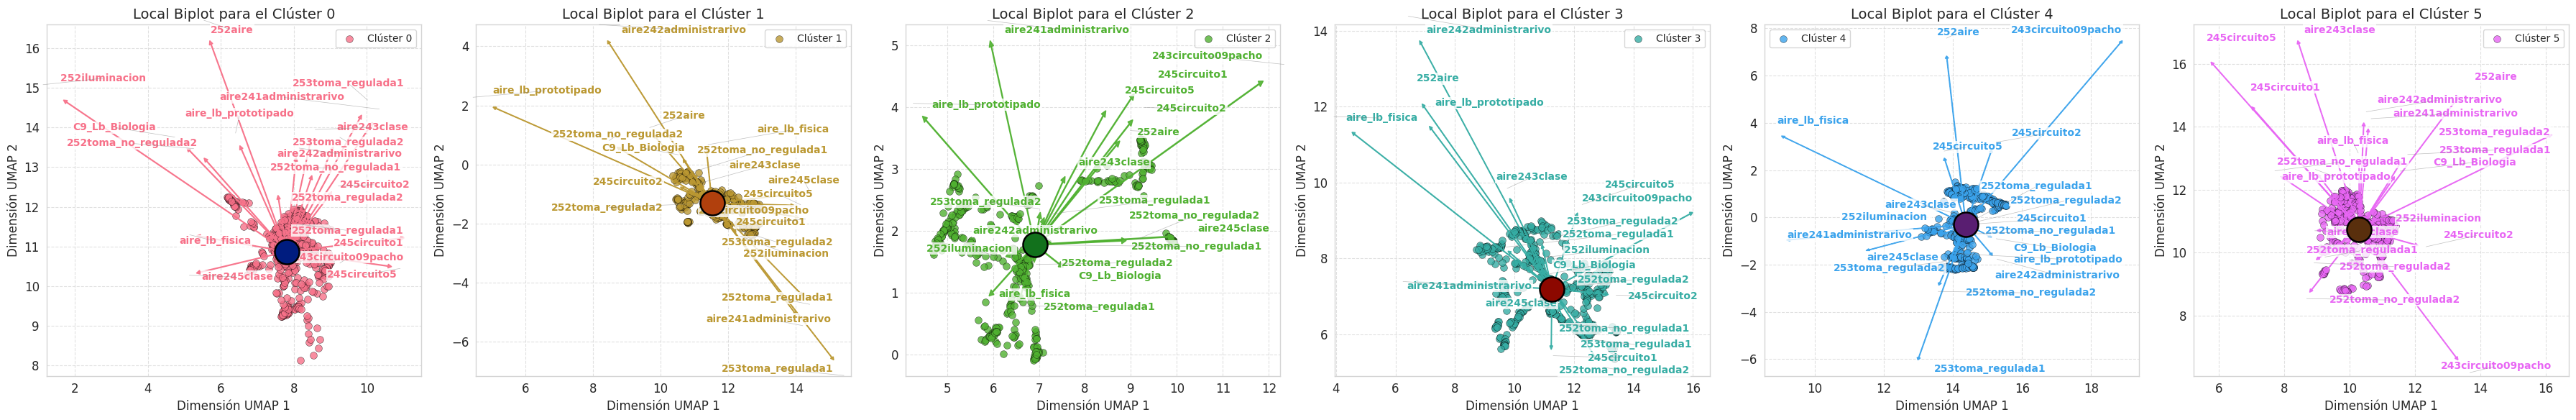

In [63]:
import matplotlib.pyplot as plt
import numpy as np

def plot_local_biplot(Z, X_scaled, cluster_labels, columns_, cluster_id, ax, arrow_length_multiplier=0.5):
    """
    Genera un biplot local enfocado en un clúster específico.

    Parámetros:
        Z (np.ndarray): Datos reducidos con UMAP (n_samples, n_components).
        X_scaled (np.ndarray): Datos originales escalados (n_samples, n_features).
        cluster_labels (np.ndarray): Arreglo con etiquetas de clúster para cada muestra.
        columns_ (list): Lista con los nombres de las variables originales.
        cluster_id (int): ID del clúster a visualizar.
        ax (matplotlib.axes.Axes): Objeto de ejes sobre el que se dibujará el gráfico.
        arrow_length_multiplier (float): Multiplicador para escalar las flechas de correlación.
    """
    # Filtrar los datos para el clúster específico
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    Z_cluster = Z[cluster_indices]
    X_scaled_cluster = X_scaled[cluster_indices]

    # Calcular el centroide del clúster en el espacio UMAP
    centroid_umap = np.mean(Z_cluster, axis=0)

    # Calcular la matriz de correlación entre las variables originales escaladas (de este clúster)
    # y las dimensiones de UMAP (también de este clúster)
    # Es necesario manejar casos donde alguna variable o dimensión tenga varianza cero
    try:
        correlation_matrix_cluster = np.corrcoef(X_scaled_cluster.T, Z_cluster.T)[:len(columns_), len(columns_):]
        # Reemplazar NaNs e infinitos por 0 si hay varianza cero
        correlation_matrix_cluster = np.nan_to_num(correlation_matrix_cluster, nan=0.0, posinf=0.0, neginf=0.0)
    except ValueError:
        # Manejar el caso donde no hay suficientes datos en el clúster para calcular la correlación
        print(f"Advertencia: No hay suficientes datos en el Clúster {cluster_id} para calcular la correlación. Se omite el biplot.")
        return

    # Normalizar los vectores de correlación para su visualización
    if np.max(np.abs(correlation_matrix_cluster)) > 1e-9:  # Evitar división por cero
        correlation_matrix_cluster_scaled = (
            correlation_matrix_cluster / np.max(np.abs(correlation_matrix_cluster))
            * np.max(np.abs(Z_cluster)) * arrow_length_multiplier
        )
    else:
        correlation_matrix_cluster_scaled = correlation_matrix_cluster * 0  # Todos ceros si no hay varianza

    # 1. Graficar los puntos del clúster específico
    ax.scatter(Z_cluster[:, 0], Z_cluster[:, 1],
               color=cluster_colors[cluster_id % len(cluster_colors)], alpha=0.8, s=50,
               edgecolor='k', linewidth=0.3,
               label=f'Clúster {cluster_id}')

    # 2. Graficar el centroide del clúster
    ax.scatter(centroid_umap[0], centroid_umap[1],
               marker='o', s=600, color=centroid_colors[cluster_id % len(centroid_colors)],
               edgecolors='k', linewidth=1.8, zorder=5)

    # 3. Dibujar flechas de correlación desde el centroide del clúster
    texts = []
    for i, feature in enumerate(columns_):
        arrow_vector = correlation_matrix_cluster_scaled[i, :]

        # Dibujar flechas desde el centroide
        ax.arrow(centroid_umap[0], centroid_umap[1],
                 arrow_vector[0], arrow_vector[1],
                 color=cluster_colors[cluster_id % len(cluster_colors)],
                 alpha=0.9, width=0.015,
                 head_width=0.1, head_length=0.1,
                 length_includes_head=True)

        # Añadir etiquetas de texto para las variables
        text_position = centroid_umap + arrow_vector * 1.1
        texts.append(ax.text(text_position[0], text_position[1],
                             feature, color=cluster_colors[cluster_id % len(cluster_colors)],
                             fontsize=10, fontweight='bold',
                             bbox=dict(facecolor='white', alpha=0.8,
                                       edgecolor='none', pad=1)))

    # Ajustar etiquetas para evitar superposición
    if texts:
        adjust_text(texts,
                    ax=ax,
                    only_move={'points': 'y', 'texts': 'xy'},
                    arrowprops=dict(arrowstyle='-', color='gray', lw=0.5, alpha=0.5),
                    force_points=(0.5, 0.5))

    ax.set_xlabel('Dimensión UMAP 1', fontsize=12)
    ax.set_ylabel('Dimensión UMAP 2', fontsize=12)
    ax.set_title(f'Local Biplot para el Clúster {cluster_id}', fontsize=14)
    ax.legend(fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)


# Se asume que Z, X_, cluster_labels, columns_, cluster_colors y centroid_colors fueron definidos anteriormente

# Crear una figura con múltiples subgráficos, uno por cada clúster
#n_clusters = len(np.unique(cluster_labels))
n_clusters = 6
fig, axes = plt.subplots(1, n_clusters, figsize=(6 * n_clusters, 6))

# Asegurarse de que axes sea un array incluso si solo hay un clúster
if n_clusters == 1:
    axes = [axes]

for cluster_id in range(n_clusters):
    plot_local_biplot(Z, X_, cluster_labels, columns_, cluster_id, axes[cluster_id])

plt.tight_layout()
plt.show()


localbiplot.rel_l.shape: (19, 10)


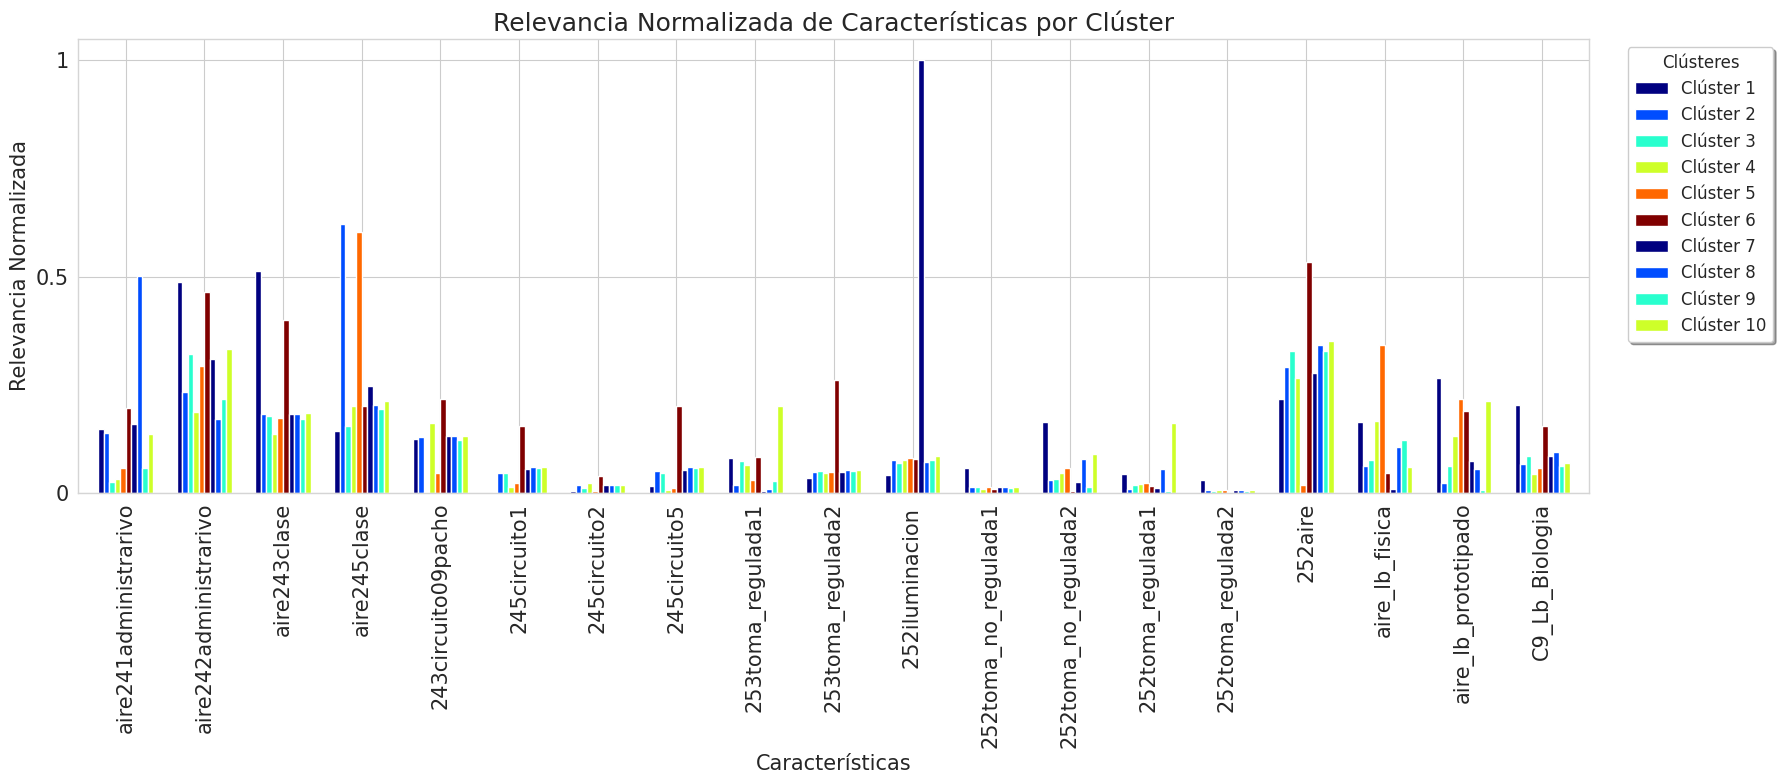

In [64]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# Asegurarse de que 'group' esté definido si se utiliza. Asumimos que son las etiquetas de clúster de K-Means.
group = cluster_labels
# Creamos un DataFrame con los datos escalados y los nombres de las columnas (features).
Xdata = pd.DataFrame(X_, columns=columns_)

# Placeholder para localbiplot.rel_l
# Basado en el contexto, localbiplot.rel_l probablemente representa la "relevancia" o "contribución"
# de cada característica a cada clúster o a las dimensiones UMAP dentro de cada clúster.
# Una forma común de estimar la relevancia de una característica en un contexto de clúster
# es observar la diferencia absoluta entre el valor medio de la característica en ese clúster
# y la media general, o la varianza de la característica dentro del clúster,
# o los loadings/correlación con las dimensiones reducidas.

# Calculemos una medida de "relevancia" simple: la diferencia media absoluta
# de cada característica con respecto a la media general, dentro de cada clúster.
# Este es un enfoque simplificado comparado con los loadings de un biplot real,
# pero se alinea con la forma esperada de localbiplot.rel_l (características x clústeres).

# Calcular la media general de las características escaladas
overall_mean_scaled = np.mean(X_, axis=0)

# Inicializar una matriz para almacenar la relevancia de las características para cada clúster
# La forma será (número de características, número de clústeres)
n_features = X_.shape[1]
n_clusters = len(np.unique(group))
localbiplot_rel_l = np.zeros((n_features, n_clusters))

# Iterar sobre cada clúster
for cluster_id in range(n_clusters):
    # Obtener los índices para el clúster actual
    cluster_indices = np.where(group == cluster_id)[0]
    if len(cluster_indices) > 0:
        # Obtener los datos escalados para el clúster actual
        X_scaled_cluster = X_[cluster_indices]
        # Calcular la media de las características escaladas para el clúster actual
        mean_scaled_features_cluster = np.mean(X_scaled_cluster, axis=0)
        # Calcular la diferencia absoluta con respecto a la media general
        # Usar la diferencia con respecto a la media global puede ser más indicativo de cómo un clúster difiere del promedio
        feature_relevance_cluster = np.abs(mean_scaled_features_cluster - overall_mean_scaled)
        # Alternativamente, usar el valor absoluto medio dentro del clúster si los datos escalados están centrados alrededor de 0
        # feature_relevance_cluster = np.mean(np.abs(X_scaled_cluster), axis=0)

        localbiplot_rel_l[:, cluster_id] = feature_relevance_cluster

# Asignar la relevancia calculada a una variable llamada `localbiplot` para que coincida con la expectativa del código original
class LocalBiplotMock:
    def __init__(self, rel_l):
        self.rel_l = rel_l

localbiplot = LocalBiplotMock(localbiplot_rel_l)

# Ahora procedemos con el código de graficación usando el localbiplot.rel_l calculado
print("localbiplot.rel_l.shape:", localbiplot.rel_l.shape)

max_val = np.max(localbiplot.rel_l)
# Manejar el caso donde max_val es cero (por ejemplo, todos los valores de relevancia son cero)
if max_val > 1e-9:
    rel_ = localbiplot.rel_l / max_val
else:
    rel_ = localbiplot.rel_l * 0 # Evitar la división por cero, establecer a ceros

# Crear el DataFrame con las características como índice y los clústeres como columnas
# La forma de rel_ es (n_features, n_clusters) = (19, 6)
# El índice deben ser los nombres de las características (19)
# Las columnas deben ser los IDs de los clústeres (6)
relev = pd.DataFrame(rel_, index=Xdata.columns, columns=[f'Clúster {i+1}' for i in range(n_clusters)]) # Etiquetas de clúster comenzando desde 1



# C_ es el número real de clústeres únicos
#C_ = len(np.unique(group))
C_ = 6
# Asegurarse de que cmap_ coincida con el número de clústeres
# Usar el número real de clústeres únicos (C_) para el remuestreo y selección del mapa de colores
cmap_ = mpl.colormaps['jet'].resampled(max(4, C_)) # Asegurar al menos 4 colores o el número de clústeres
cmap_ = cmap_(range(C_)) # Obtener colores para el número real de clústeres



# Crear el gráfico (aumentar figsize para un gráfico más grande)
fig, ax = plt.subplots(figsize=(20, 8)) # Aumentar el tamaño de la figura
# Pasar los nombres correctos de las columnas para plot.bar
relev.plot.bar(rot=90, ax=ax, color=cmap_, fontsize=15, legend=True, width=0.7) # Pasar ax a plot, legend=True y ajustar ancho de barra

# Personalizar ejes
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels(['0', '0.5', '1'], fontsize=15) # Establecer etiquetas de los ticks

# Habilitar etiquetas inferiores
ax.tick_params(labelbottom=True)

# Establecer etiquetas y título
ax.set_xlabel('Características', fontsize=15)
ax.set_ylabel('Relevancia Normalizada', fontsize=15)
ax.set_title('Relevancia Normalizada de Características por Clúster', fontsize=18) # Añadir un título para mayor claridad y aumentar tamaño

# Añadir leyenda y ajustar su posición
ax.legend(title='Clústeres', loc='upper left', bbox_to_anchor=(1.02, 1), frameon=True, shadow=True)


# Ajustar diseño y mostrar gráfico
fig.tight_layout(rect=[0, 0, 0.9, 1]) # Usar fig.tight_layout() y ajustar el rectángulo para dejar espacio a la leyenda

# Guardar figura (opcional)
# ax.get_figure().savefig('plot.pdf', dpi=300) # Usar fig.savefig() en lugar de ax.get_figure().savefig()
# fig.savefig('relevancia_caracteristicas_normalizada.pdf', dpi=300, bbox_inches='tight')

plt.show()

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


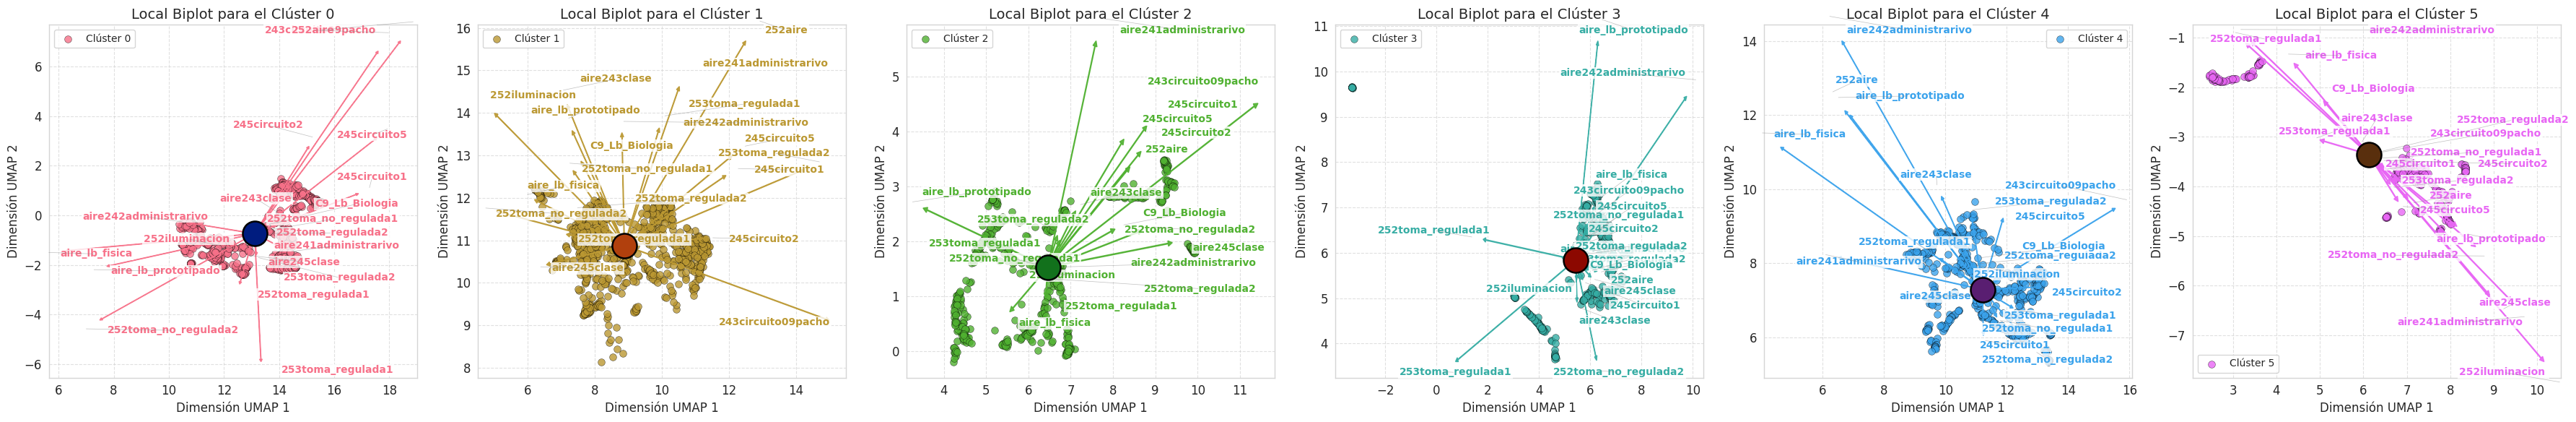

localbiplot.rel_l.shape: (19, 6)


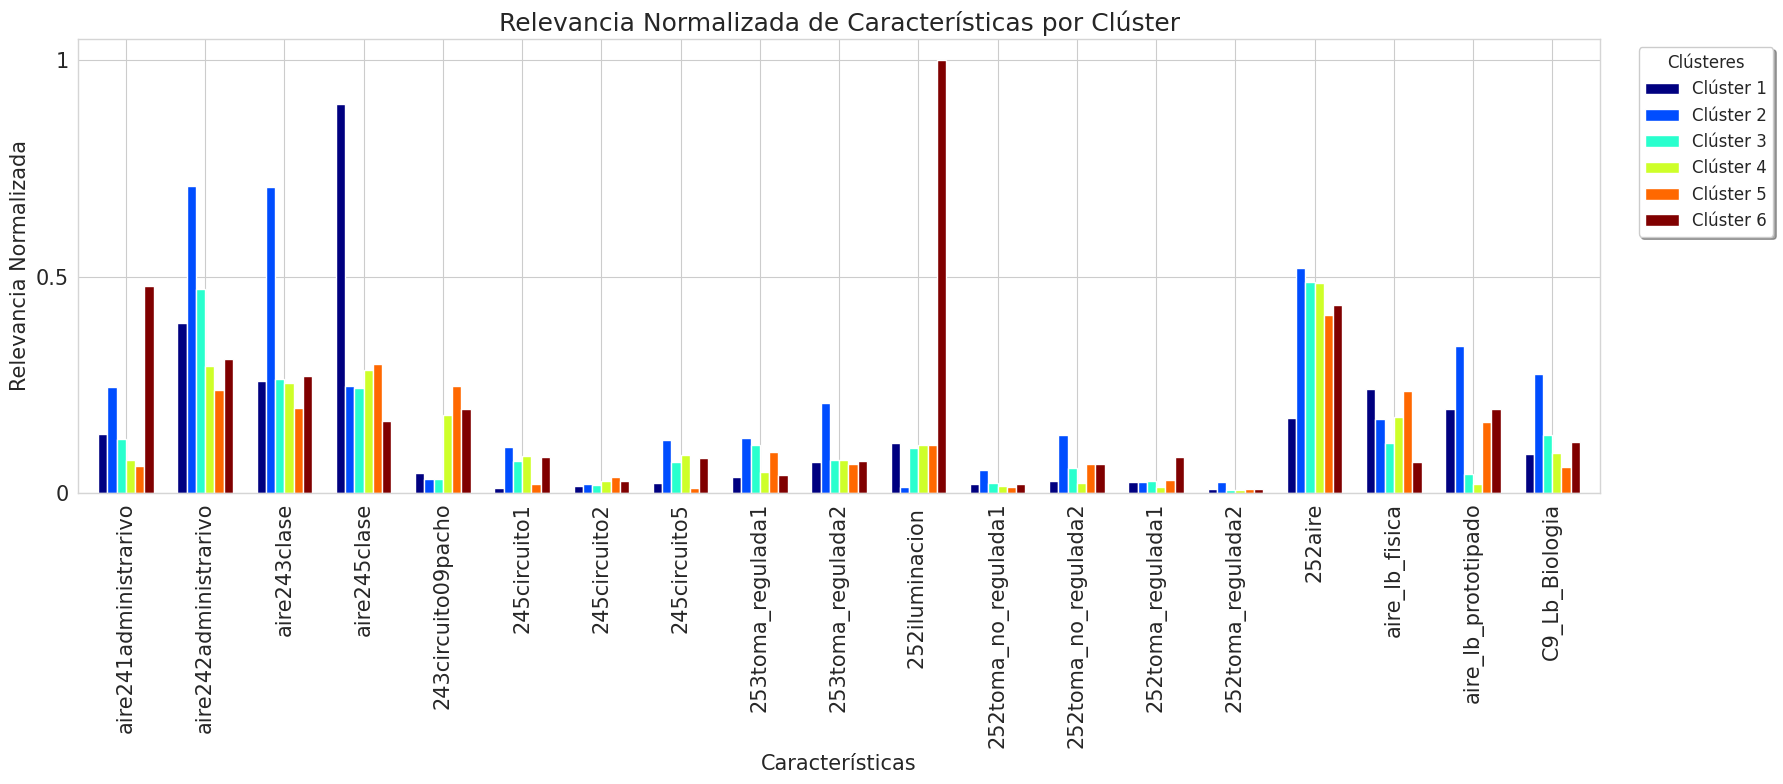

In [65]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Se asume que Z, X_, cluster_labels, columns_, cluster_colors y centroid_colors fueron definidos anteriormente

# Definir el número de clústeres deseado
n_clusters = 6

# Recalcular las etiquetas de clúster con 6 clústeres
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(Z)

# Recalcular los centroides UMAP para los 6 clústeres
centroids_umap = []
for cluster in range(n_clusters):
    centroid = Z[cluster_labels == cluster].mean(axis=0)
    centroids_umap.append(centroid)

# Crear una figura con múltiples subgráficos, uno por cada clúster
fig, axes = plt.subplots(1, n_clusters, figsize=(6 * n_clusters, 6))

# Asegurarse de que axes sea un array incluso si solo hay un clúster (aunque aquí siempre serán 6)
if n_clusters == 1:
    axes = [axes]

for cluster_id in range(n_clusters):
    plot_local_biplot(Z, X_, cluster_labels, columns_, cluster_id, axes[cluster_id])

plt.tight_layout()
plt.show()




# Asegurarse de que 'group' esté definido si se utiliza. Asumimos que son las etiquetas de clúster de K-Means.
group = cluster_labels
# Creamos un DataFrame con los datos escalados y los nombres de las columnas (features).
Xdata = pd.DataFrame(X_, columns=columns_)

# Placeholder para localbiplot.rel_l
# Basado en el contexto, localbiplot.rel_l probablemente representa la "relevancia" o "contribución"
# de cada característica a cada clúster o a las dimensiones UMAP dentro de cada clúster.
# Una forma común de estimar la relevancia de una característica en un contexto de clúster
# es observar la diferencia absoluta entre el valor medio de la característica en ese clúster
# y la media general, o la varianza de la característica dentro del clúster,
# o los loadings/correlación con las dimensiones reducidas.

# Calculemos una medida de "relevancia" simple: la diferencia media absoluta
# de cada característica con respecto a la media general, dentro de cada clúster.
# Este es un enfoque simplificado comparado con los loadings de un biplot real,
# pero se alinea con la forma esperada de localbiplot.rel_l (características x clústeres).

# Calcular la media general de las características escaladas
overall_mean_scaled = np.mean(X_, axis=0)

# Inicializar una matriz para almacenar la relevancia de las características para cada clúster
# La forma será (número de características, número de clústeres)
n_features = X_.shape[1]
# n_clusters ya está definido como 6
localbiplot_rel_l = np.zeros((n_features, n_clusters))

# Iterar sobre cada clúster
for cluster_id in range(n_clusters):
    # Obtener los índices para el clúster actual
    cluster_indices = np.where(group == cluster_id)[0]
    if len(cluster_indices) > 0:
        # Obtener los datos escalados para el clúster actual
        X_scaled_cluster = X_[cluster_indices]
        # Calcular la media de las características escaladas para el clúster actual
        mean_scaled_features_cluster = np.mean(X_scaled_cluster, axis=0)
        # Calcular la diferencia absoluta con respecto a la media general
        # Usar la diferencia con respecto a la media global puede ser más indicativo de cómo un clúster difiere del promedio
        feature_relevance_cluster = np.abs(mean_scaled_features_cluster - overall_mean_scaled)
        # Alternativamente, usar el valor absoluto medio dentro del clúster si los datos escalados están centrados alrededor de 0
        # feature_relevance_cluster = np.mean(np.abs(X_scaled_cluster), axis=0)

        localbiplot_rel_l[:, cluster_id] = feature_relevance_cluster

# Asignar la relevancia calculada a una variable llamada `localbiplot` para que coincida con la expectativa del código original
class LocalBiplotMock:
    def __init__(self, rel_l):
        self.rel_l = rel_l

localbiplot = LocalBiplotMock(localbiplot_rel_l)

# Ahora procedemos con el código de graficación usando el localbiplot.rel_l calculado
print("localbiplot.rel_l.shape:", localbiplot.rel_l.shape)

max_val = np.max(localbiplot.rel_l)
# Manejar el caso donde max_val es cero (por ejemplo, todos los valores de relevancia son cero)
if max_val > 1e-9:
    rel_ = localbiplot.rel_l / max_val
else:
    rel_ = localbiplot.rel_l * 0 # Evitar la división por cero, establecer a ceros

# Crear el DataFrame con las características como índice y los clústeres como columnas
# La forma de rel_ es (n_features, n_clusters) = (19, 6)
# El índice deben ser los nombres de las características (19)
# Las columnas deben ser los IDs de los clústeres (6)
relev = pd.DataFrame(rel_, index=Xdata.columns, columns=[f'Clúster {i+1}' for i in range(n_clusters)]) # Etiquetas de clúster comenzando desde 1



# C_ es el número real de clústeres únicos
C_ = n_clusters # Usamos el número de clústeres deseado
# Asegurarse de que cmap_ coincida con el número de clústeres
# Usar el número real de clústeres únicos (C_) para el remuestreo y selección del mapa de colores
cmap_ = mpl.colormaps['jet'].resampled(max(4, C_)) # Asegurar al menos 4 colores o el número de clústeres
cmap_ = cmap_(range(C_)) # Obtener colores para el número real de clústeres



# Crear el gráfico (aumentar figsize para un gráfico más grande)
fig, ax = plt.subplots(figsize=(20, 8)) # Aumentar el tamaño de la figura
# Pasar los nombres correctos de las columnas para plot.bar
relev.plot.bar(rot=90, ax=ax, color=cmap_, fontsize=15, legend=True, width=0.7) # Pasar ax a plot, legend=True y ajustar ancho de barra

# Personalizar ejes
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels(['0', '0.5', '1'], fontsize=15) # Establecer etiquetas de los ticks

# Habilitar etiquetas inferiores
ax.tick_params(labelbottom=True)

# Establecer etiquetas y título
ax.set_xlabel('Características', fontsize=15)
ax.set_ylabel('Relevancia Normalizada', fontsize=15)
ax.set_title('Relevancia Normalizada de Características por Clúster', fontsize=18) # Añadir un título para mayor claridad y aumentar tamaño

# Añadir leyenda y ajustar su posición
ax.legend(title='Clústeres', loc='upper left', bbox_to_anchor=(1.02, 1), frameon=True, shadow=True)


# Ajustar diseño y mostrar gráfico
fig.tight_layout(rect=[0, 0, 0.9, 1]) # Usar fig.tight_layout() y ajustar el rectángulo para dejar espacio a la leyenda

# Guardar figura (opcional)
# ax.get_figure().savefig('plot.pdf', dpi=300) # Usar fig.savefig() en lugar de ax.get_figure().savefig()
# fig.savefig('relevancia_caracteristicas_normalizada.pdf', dpi=300, bbox_inches='tight')

plt.show()


In [66]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Define the target variable
target_column = '253toma_regulada1'

# Define features for the regressor
# Using the original scaled features (X_) might be better as they were used for UMAP and clustering
# Let's use the original columns that went into UMAP and scaling
feature_columns = columns_ # Using the same columns as UMAP

# Drop the target column from features if it's included
if target_column in feature_columns:
    feature_columns = [col for col in feature_columns if col != target_column]

# Prepare the data
X = df_[feature_columns]
y = df_[target_column]

# Scale the features (using the same scaler fitted before, if applicable, or fit a new one)
# Let's refit a scaler just for this section to be self-contained regarding features
scaler_features = MinMaxScaler()
X_scaled = scaler_features.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Simple Linear Regression ---
print("--- Simple Linear Regression ---")
linear_regressor = LinearRegression()

# Train the model
linear_regressor.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_regressor.predict(X_test)

# Evaluate the model
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

print(f'RMSE (Linear Regression): {rmse_linear:.4f}')
print(f'R² (Linear Regression): {r2_linear:.4f}')
print("-" * 30)


# --- Random Forest Regressor (as another example regressor) ---
print("--- Random Forest Regressor ---")
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f'RMSE (Random Forest): {rmse_rf:.4f}')
print(f'R² (Random Forest): {r2_rf:.4f}')
print("-" * 30)

# --- Regressors with Windowing ---

# This involves creating lagged features or using a sliding window approach.
# For simplicity, let's create lagged versions of the features and the target.
# We need a time index for this. Assuming the DataFrame is already in time order.

def create_lagged_features(dataframe, target_col, features_cols, n_lags=1):
    """
    Creates a new DataFrame with lagged features and target.

    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        target_col (str): The name of the target column.
        features_cols (list): List of feature column names.
        n_lags (int): The number of lags to create.

    Returns:
        pd.DataFrame: DataFrame with original data shifted to align with lagged data.
        pd.DataFrame: DataFrame containing the lagged features and target.
    """
    lagged_df = pd.DataFrame()
    original_data = dataframe[[target_col] + features_cols].copy()

    # Create lagged features
    for col in features_cols:
        for i in range(1, n_lags + 1):
            lagged_df[f'{col}_lag{i}'] = original_data[col].shift(i)

    # Create lagged target
    for i in range(1, n_lags + 1):
         lagged_df[f'{target_col}_lag{i}'] = original_data[target_col].shift(i)

    # Drop rows with NaN values created by shifting
    combined_df = pd.concat([original_data, lagged_df], axis=1).dropna()

    return combined_df

# Define the number of lags
n_lags = 5 # Example: Use the previous 5 time steps as features

# Create the lagged DataFrame
df_lagged = create_lagged_features(df_, target_column, feature_columns, n_lags)

# Define new features (the lagged ones) and the target (the current value)
lagged_feature_columns = [col for col in df_lagged.columns if ('_lag' in col)]
lagged_target = df_lagged[target_column]
lagged_features = df_lagged[lagged_feature_columns]

# Scale the lagged features
scaler_lagged_features = MinMaxScaler()
lagged_features_scaled = scaler_lagged_features.fit_transform(lagged_features)

# Split lagged data
X_train_lagged, X_test_lagged, y_train_lagged, y_test_lagged = train_test_split(
    lagged_features_scaled, lagged_target, test_size=0.2, random_state=42
)

# --- Linear Regression with Lagged Features ---
print("--- Linear Regression with Lagged Features (Windowing) ---")
linear_regressor_lagged = LinearRegression()

# Train the model
linear_regressor_lagged.fit(X_train_lagged, y_train_lagged)

# Make predictions
y_pred_linear_lagged = linear_regressor_lagged.predict(X_test_lagged)

# Evaluate the model
rmse_linear_lagged = np.sqrt(mean_squared_error(y_test_lagged, y_pred_linear_lagged))
r2_linear_lagged = r2_score(y_test_lagged, y_pred_linear_lagged)

print(f'RMSE (Linear Regression with Lagged Features): {rmse_linear_lagged:.4f}')
print(f'R² (Linear Regression with Lagged Features): {r2_linear_lagged:.4f}')
print("-" * 30)

# --- Random Forest Regressor with Lagged Features ---
print("--- Random Forest Regressor with Lagged Features (Windowing) ---")
rf_regressor_lagged = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor_lagged.fit(X_train_lagged, y_train_lagged)

# Make predictions
y_pred_rf_lagged = rf_regressor_lagged.predict(X_test_lagged)

# Evaluate the model
rmse_rf_lagged = np.sqrt(mean_squared_error(y_test_lagged, y_pred_rf_lagged))
r2_rf_lagged = r2_score(y_test_lagged, y_pred_rf_lagged)

print(f'RMSE (Random Forest with Lagged Features): {rmse_rf_lagged:.4f}')
print(f'R² (Random Forest with Lagged Features): {r2_rf_lagged:.4f}')
print("-" * 30)

# You can compare the R² and RMSE values to see if adding lagged features improves performance.
# The window size (n_lags) is a hyperparameter that can be tuned.
# Other windowing techniques include moving averages or rolling statistics as features.


--- Simple Linear Regression ---
RMSE (Linear Regression): 0.0277
R² (Linear Regression): 0.2786
------------------------------
--- Random Forest Regressor ---
RMSE (Random Forest): 0.0206
R² (Random Forest): 0.6022
------------------------------
--- Linear Regression with Lagged Features (Windowing) ---
RMSE (Linear Regression with Lagged Features): 0.0188
R² (Linear Regression with Lagged Features): 0.6301
------------------------------
--- Random Forest Regressor with Lagged Features (Windowing) ---
RMSE (Random Forest with Lagged Features): 0.0180
R² (Random Forest with Lagged Features): 0.6625
------------------------------


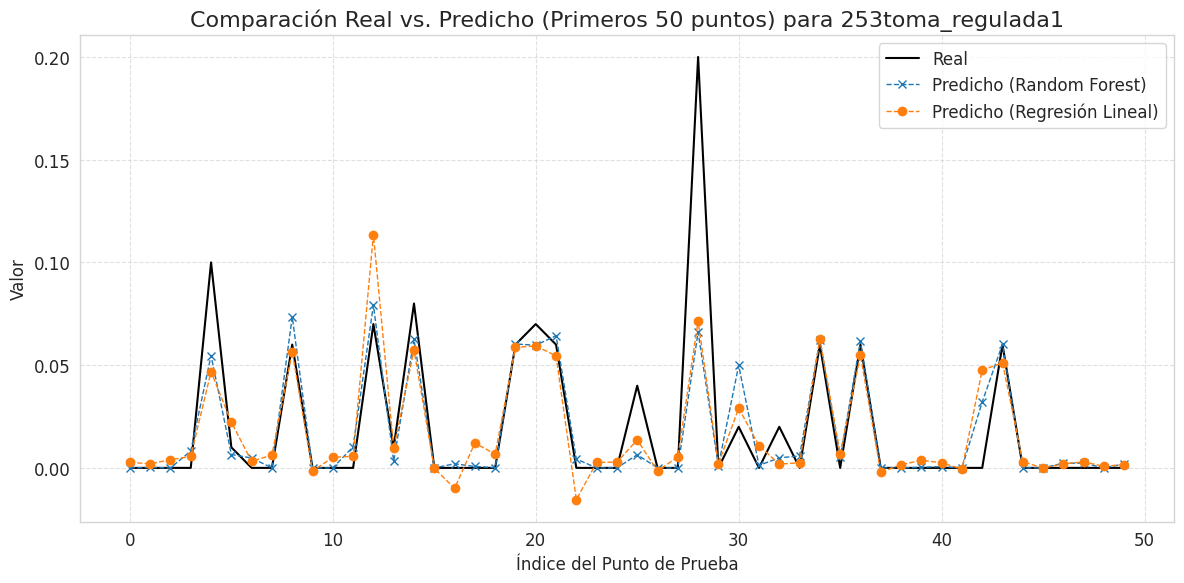

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Crear los DataFrames con las predicciones
results_rf = pd.DataFrame({
    'Actual': y_test_lagged[:50],
    'Predicho_RF': y_pred_rf_lagged[:50]
})
results_linear = pd.DataFrame({
    'Predicho_LR': y_pred_linear_lagged[:50]
})

# Crear la secuencia para los primeros 50 puntos
x_sequence = np.arange(50)

# Gráfico de líneas combinado para los primeros 50 puntos
plt.figure(figsize=(12, 6))

plt.plot(x_sequence, results_rf['Actual'], label='Real', color='black', linewidth=1.5)
plt.plot(x_sequence, results_rf['Predicho_RF'], label='Predicho (Random Forest)', linestyle='--', marker='x', linewidth=1)
plt.plot(x_sequence, results_linear['Predicho_LR'], label='Predicho (Regresión Lineal)', linestyle='--', marker='o', linewidth=1)

plt.title(f'Comparación Real vs. Predicho (Primeros 50 puntos) para {target_column}', fontsize=16)
plt.xlabel('Índice del Punto de Prueba', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


--- Linear Regression with Lagged Features (Windowing) ---
--- Linear Regression with Windowing ---
MAE: 0.0086
MSE: 0.0004
RMSE: 0.0188
R²: 0.6301
------------------------------
--- Random Forest Regressor with Lagged Features (Windowing) ---
--- Random Forest Regressor with Windowing ---
MAE: 0.0068
MSE: 0.0003
RMSE: 0.0180
R²: 0.6625
------------------------------
--- Support Vector Regressor (SVR) with Lagged Features (Windowing) ---
--- SVR with Windowing ---
MAE: 0.0801
MSE: 0.0069
RMSE: 0.0829
R²: -6.1520
------------------------------


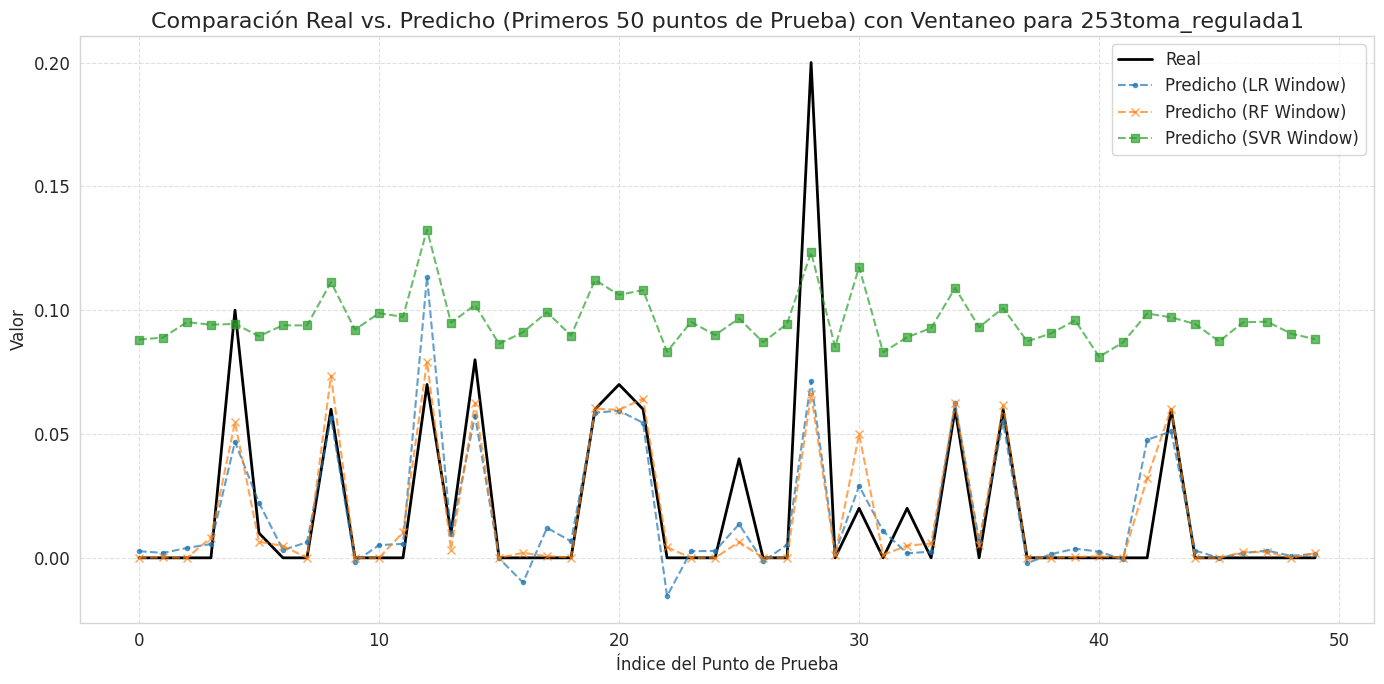

In [68]:

from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


# Redefine target, features, scaling, and splitting for lagged data using df_lagged
target_column = '253toma_regulada1' # This is the CURRENT target
lagged_feature_columns = [col for col in df_lagged.columns if '_lag' in col] # These are the lagged features and lagged target

X_lagged = df_lagged[lagged_feature_columns]
y_lagged = df_lagged[target_column] # Predict the current value of the target

# Scale the lagged features
scaler_lagged_features = MinMaxScaler()
X_lagged_scaled = scaler_lagged_features.fit_transform(X_lagged)

# Split lagged data
X_train_lagged, X_test_lagged, y_train_lagged, y_test_lagged = train_test_split(
    X_lagged_scaled, y_lagged, test_size=0.2, random_state=42
)

# Function to evaluate models and print metrics
def evaluate_regressor(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"--- {model_name} ---")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    print("-" * 30)

    return y_pred

# --- Linear Regression with Lagged Features ---
print("--- Linear Regression with Lagged Features (Windowing) ---")
linear_regressor_lagged = LinearRegression()
linear_regressor_lagged.fit(X_train_lagged, y_train_lagged)
y_pred_linear_lagged = evaluate_regressor(linear_regressor_lagged, X_test_lagged, y_test_lagged, "Linear Regression with Windowing")

# --- Random Forest Regressor with Lagged Features ---
print("--- Random Forest Regressor with Lagged Features (Windowing) ---")
rf_regressor_lagged = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor_lagged.fit(X_train_lagged, y_train_lagged)
y_pred_rf_lagged = evaluate_regressor(rf_regressor_lagged, X_test_lagged, y_test_lagged, "Random Forest Regressor with Windowing")

# --- Support Vector Regressor (SVR) with Lagged Features ---
print("--- Support Vector Regressor (SVR) with Lagged Features (Windowing) ---")
# SVR can be sensitive to scaling and hyperparameters. Using a common kernel like rbf.
svr_regressor_lagged = SVR(kernel='rbf') # You might need to tune C and gamma
svr_regressor_lagged.fit(X_train_lagged, y_train_lagged)
y_pred_svr_lagged = evaluate_regressor(svr_regressor_lagged, X_test_lagged, y_test_lagged, "SVR with Windowing")


# Create DataFrames for plotting the first 50 test points
results_lagged = pd.DataFrame({
    'Actual': y_test_lagged[:50],
    'Predicho_LR_Window': y_pred_linear_lagged[:50],
    'Predicho_RF_Window': y_pred_rf_lagged[:50],
    'Predicho_SVR_Window': y_pred_svr_lagged[:50]
})

# Reset index to use sequential numbers for the x-axis
results_lagged = results_lagged.reset_index(drop=True)
x_sequence = results_lagged.index

# Plotting the comparison for the first 50 points
plt.figure(figsize=(14, 7))

plt.plot(x_sequence, results_lagged['Actual'], label='Real', color='black', linewidth=2)
plt.plot(x_sequence, results_lagged['Predicho_LR_Window'], label='Predicho (LR Window)', linestyle='--', marker='.', alpha=0.7)
plt.plot(x_sequence, results_lagged['Predicho_RF_Window'], label='Predicho (RF Window)', linestyle='--', marker='x', alpha=0.7)
plt.plot(x_sequence, results_lagged['Predicho_SVR_Window'], label='Predicho (SVR Window)', linestyle='--', marker='s', alpha=0.7)

plt.title(f'Comparación Real vs. Predicho (Primeros 50 puntos de Prueba) con Ventaneo para {target_column}', fontsize=16)
plt.xlabel('Índice del Punto de Prueba', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
